In [2]:
from loadImgsAndLabels import loadloadImgsAndLabels

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


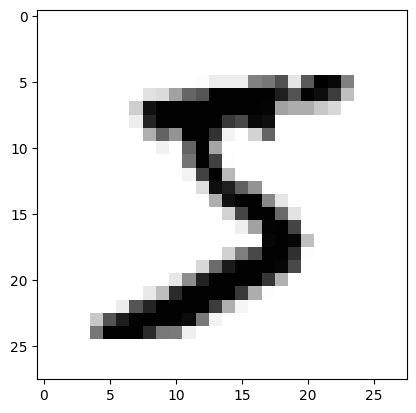

In [3]:
x_train, y_train = loadloadImgsAndLabels(
	'../datasets/train-images.idx3-ubyte',
	'../datasets/train-labels.idx1-ubyte'
)

x_train, x_val = np.split(x_train, [50000])
y_train, y_val = np.split(y_train, [50000])

x_test, y_test = loadloadImgsAndLabels(
	'../datasets/t10k-images.idx3-ubyte',
	'../datasets/t10k-labels.idx1-ubyte'
)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = map(
	torch.tensor,
	(x_train, y_train, x_val, y_val, x_test, y_test)
)

In [17]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

def accuracy(out, yb):
	preds = torch.argmax(out, dim=1)
	return (preds == yb).float().mean()

def model(xb):
	return xb @ weights + bias


loss_func = F.cross_entropy

epochs = 2 
bs = 64
n, c = x_train.shape
lr = 0.5

def fit():
		for epoch in range(epochs):
			for i in range((n - 1) // bs + 1):
				start_i = i * bs
				end_i = start_i + bs
				xb = x_train[start_i:end_i]
				yb = y_train[start_i:end_i]
				pred = model(xb)
				loss = loss_func(pred, yb)

				loss.backward()
				with torch.no_grad():
					for p in model.parameters():
						p -= p.grad * lr
					model.zero_grad()


In [42]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, dtype=torch.float64)

    def forward(self, xb):
        return self.lin(xb)

In [43]:
model = Mnist_Logistic()

xb = x_train[0:bs] 
yb = y_train[0:bs]
# print(xb.dtype)

print(loss_func(model(xb), yb))

tensor(2.5045, dtype=torch.float64, grad_fn=<NllLossBackward0>)


In [46]:
fit()
print(loss_func(model(xb), yb))

tensor(2.1641, dtype=torch.float64, grad_fn=<NllLossBackward0>)
